In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as statss
from scipy import stats
# Sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,StratifiedKFold




In [2]:
red_wine=pd.read_csv("./Data_Set/winequality-red.csv",sep=";")
white_wine=pd.read_csv("./Data_Set/winequality-white.csv",sep=";")

In [3]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**# NEW COLUMN**

In [5]:
red_wine2=red_wine.assign(wine_color="red")
red_wine2.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
red_wine2["quality_label"]=red_wine2["quality"].apply(lambda value:"low" if value <=5 else "medium"
if value <=7 else "high" )
red_wine2.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [7]:
white_wine2=white_wine.assign(wine_color="white")
white_wine2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
white_wine2["quality_label"]=white_wine2["quality"].apply(lambda value: "low" if value<=5 else "medium"
if value<=7 else "high")
white_wine2.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,medium


In [9]:
red_wine2["quality_label"]=pd.Categorical(red_wine2["quality_label"],categories=("low","medium","high"))

In [10]:
white_wine2["quality_label"]=pd.Categorical(white_wine2["quality_label"],categories=("low","medium","high"))

**Concat**

In [11]:
wines=pd.concat([red_wine2,white_wine2])
wines.shape

(6497, 14)

**DATA CLEANING**

In [12]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_color              0
quality_label           0
dtype: int64

In [13]:
wines.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_color              0
quality_label           0
dtype: int64

In [14]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [15]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  wine_color            6497 non-null   object  
 13  quality_label         6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [16]:
wines.rename(columns={"fixed acidity":"fixed_acidity","volatile acidity":"volatile_acidity","citric acid":"citric_acid","residual sugar":"residual_sugar","free sulfur dioxide":"free_sulfur_dioxide","total sulfur dioxide":"total_sulfur_dioxide"},inplace=True)

MACHINE LEARNING
ENCODING

In [17]:
le=LabelEncoder()

In [18]:
red_wine2["Quality_Cat"]=le.fit_transform(red_wine2["quality_label"])

In [19]:

red_wine2[red_wine2["Quality_Cat"] == 0] 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color,quality_label,Quality_Cat
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8,red,high,0
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8,red,high,0
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8,red,high,0
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8,red,high,0
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8,red,high,0
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8,red,high,0
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,red,high,0
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,red,high,0
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,red,high,0
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8,red,high,0


SPLITING

In [20]:
X=red_wine2.iloc[:,0:11] #input

y=red_wine2.Quality_Cat #target



print(y.shape)
print(X.shape)

(1599,)
(1599, 11)


In [21]:

from sklearn.model_selection import StratifiedKFold
Kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=1599)
Kf.get_n_splits(X)


5

In [22]:
for train_index,test_index in Kf.split(X,y):
    #print("TRAIN:",train_index,"TEST:",test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    

PREDICTING. Random Forest


In [23]:

RF=RandomForestClassifier(n_estimators=400)
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400)

In [24]:
pred_RF=RF.predict(X_test)

In [25]:
RF.predict(X_test[0:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
RF.predict_proba(X_test[:10])

array([[0.    , 0.9575, 0.0425],
       [0.    , 0.825 , 0.175 ],
       [0.    , 0.63  , 0.37  ],
       [0.    , 0.865 , 0.135 ],
       [0.005 , 0.77  , 0.225 ],
       [0.    , 0.5725, 0.4275],
       [0.    , 0.7425, 0.2575],
       [0.005 , 0.525 , 0.47  ],
       [0.0025, 0.63  , 0.3675],
       [0.    , 0.815 , 0.185 ]])

In [27]:
X_test[:10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5
25,6.3,0.390,0.16,1.4,0.080,11.0,23.0,0.9955,3.34,0.56,9.3
29,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.9964,3.38,0.59,9.8
30,6.7,0.675,0.07,2.4,0.089,17.0,82.0,0.9958,3.35,0.54,10.1
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.9966,3.46,0.57,10.6
34,5.2,0.320,0.25,1.8,0.103,13.0,50.0,0.9957,3.38,0.55,9.2
35,7.8,0.645,0.00,5.5,0.086,5.0,18.0,0.9986,3.40,0.55,9.6


In [28]:
y_test[:10]

0     1
6     1
18    1
22    1
25    1
29    2
30    1
31    2
34    1
35    2
Name: Quality_Cat, dtype: int64

EVALUATION

In [29]:
# 0- high 
#1 - low
#2- medium
label=["high","low","medium"]
cm=confusion_matrix(y_test,pred_RF)
pd.DataFrame(cm,index=label,columns=label)

,high,low,medium
high,1,0,2
low,0,121,27
medium,0,32,136


In [30]:
print("accuracy_score -",accuracy_score(y_test,pred_RF))

accuracy_score - 0.8087774294670846


In [31]:
print(classification_report(y_test,pred_RF,target_names=["high","low","medium"]))

              precision    recall  f1-score   support

        high       1.00      0.33      0.50         3
         low       0.79      0.82      0.80       148
      medium       0.82      0.81      0.82       168

    accuracy                           0.81       319
   macro avg       0.87      0.65      0.71       319
weighted avg       0.81      0.81      0.81       319



MODEL IMPROVEMENT

In [32]:
#get importance
importance = RF.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.06889
Feature: 1, Score: 0.11185
Feature: 2, Score: 0.06470
Feature: 3, Score: 0.05794
Feature: 4, Score: 0.07212
Feature: 5, Score: 0.05999
Feature: 6, Score: 0.10208
Feature: 7, Score: 0.08981
Feature: 8, Score: 0.06973
Feature: 9, Score: 0.13351
Feature: 10, Score: 0.16940


/Users/Yanaorfin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


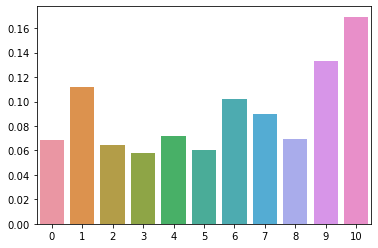

In [33]:
sns.barplot([x for x in range(len(importance))],importance)
plt.show()